앞의 예제를 Custom loss function을 활용하여 딥러닝으로 최대값을 구해봅시다

pandas data reader를 활용해서 주가를 받겠습니다. 

https://pandas-datareader.readthedocs.io/en/latest/


In [132]:
import numpy as np
import pandas_datareader as pdr

In [133]:
# kospi 지수를 받습니다. 

df = pdr.DataReader('kospi', 'naver', start='2010-01-01')

In [134]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,168171,169614,168171,169614,291082
2010-01-05,170162,170239,168645,169062,402043
2010-01-06,169788,170689,169610,170532,420481
2010-01-07,170292,170790,168345,168345,456464
2010-01-08,169406,169526,166884,169526,371357
...,...,...,...,...,...
2022-05-18,263475,264413,261800,262598,870268
2022-05-19,257624,259779,256854,259234,677595
2022-05-20,260578,264168,260538,263929,755652


In [135]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [136]:
import pandas as pd

df =df[:].apply(pd.to_numeric)

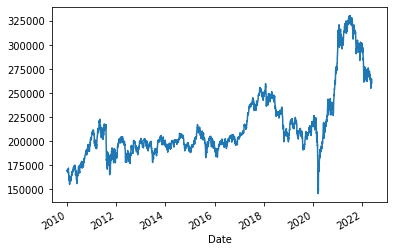

In [137]:
df.Close.plot()

In [138]:
# 가격이 소수점 2자리가 정수로 표현되어 수정해줍니다. 거래량을 제외하고 합니다. 

df.loc[:,'Open':'Close'] = df.loc[:,'Open':'Close' ].apply(lambda x: x/100)

In [139]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,291082
2010-01-05,1701.62,1702.39,1686.45,1690.62,402043
2010-01-06,1697.88,1706.89,1696.10,1705.32,420481
2010-01-07,1702.92,1707.90,1683.45,1683.45,456464
2010-01-08,1694.06,1695.26,1668.84,1695.26,371357


기간별 수익률을 만들어서 feature로 사용하고, 5일뒤 수익률을 최대화하기 위한 데이터를 만들어 봅시다

In [140]:
# 과거 날짜의 종가를 이동시켜서 컬럼을 만듭니다. 

df['1day'] = df.Close.shift(1)

In [141]:
df.head()

,Open,High,Low,Close,Volume,1day
Date,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,291082,NaN
2010-01-05,1701.62,1702.39,1686.45,1690.62,402043,1696.14
2010-01-06,1697.88,1706.89,1696.10,1705.32,420481,1690.62
2010-01-07,1702.92,1707.90,1683.45,1683.45,456464,1705.32
2010-01-08,1694.06,1695.26,1668.84,1695.26,371357,1683.45


In [142]:
df['5day']= df.Close.shift(5)
df['20day']= df.Close.shift(20)
df['60day']= df.Close.shift(60)
df['120day']= df.Close.shift(120)

In [143]:
# 수익률 계산을 합니다. 
df['rtn_1d'] = df.Close/df['1day']-1
df['rtn_5d'] = df.Close/df['5day']-1
df['rtn_20d'] = df.Close/df['20day']-1
df['rtn_60d'] = df.Close/df['60day']-1
df['rtn_120d'] = df.Close/df['120day']-1

In [144]:
df.head(20)

,Open,High,Low,Close,Volume,1day,5day,20day,60day,120day,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d
Date,,,,,,,,,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,291082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1701.62,1702.39,1686.45,1690.62,402043,1696.14,NaN,NaN,NaN,NaN,-0.003254,NaN,NaN,NaN,NaN
2010-01-06,1697.88,1706.89,1696.10,1705.32,420481,1690.62,NaN,NaN,NaN,NaN,0.008695,NaN,NaN,NaN,NaN
2010-01-07,1702.92,1707.90,1683.45,1683.45,456464,1705.32,NaN,NaN,NaN,NaN,-0.012825,NaN,NaN,NaN,NaN
2010-01-08,1694.06,1695.26,1668.84,1695.26,371357,1683.45,NaN,NaN,NaN,NaN,0.007015,NaN,NaN,NaN,NaN
2010-01-11,1700.79,1705.73,1694.12,1694.12,399263,1695.26,1696.14,NaN,NaN,NaN,-0.000672,-0.001191,NaN,NaN,NaN
2010-01-12,1695.83,1701.16,1683.29,1698.64,377882,1694.12,1690.62,NaN,NaN,NaN,0.002668,0.004744,NaN,NaN,NaN
2010-01-13,1683.51,1687.58,1671.11,1671.41,356033,1698.64,1705.32,NaN,NaN,NaN,-0.016030,-0.019885,NaN,NaN,NaN
2010-01-14,1680.68,1692.78,1677.46,1685.77,428554,1671.41,1683.45,NaN,NaN,NaN,0.008592,0.001378,NaN,NaN,NaN


In [145]:
# 5일 뒤의 수익률을 만들어 봅시다. 
df['future_rtn_5d'] = df.Close.shift(-5)/df.Close - 1


In [146]:
df.head(20)

,Open,High,Low,Close,Volume,1day,5day,20day,60day,120day,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,future_rtn_5d
Date,,,,,,,,,,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,291082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001191
2010-01-05,1701.62,1702.39,1686.45,1690.62,402043,1696.14,NaN,NaN,NaN,NaN,-0.003254,NaN,NaN,NaN,NaN,0.004744
2010-01-06,1697.88,1706.89,1696.10,1705.32,420481,1690.62,NaN,NaN,NaN,NaN,0.008695,NaN,NaN,NaN,NaN,-0.019885
2010-01-07,1702.92,1707.90,1683.45,1683.45,456464,1705.32,NaN,NaN,NaN,NaN,-0.012825,NaN,NaN,NaN,NaN,0.001378
2010-01-08,1694.06,1695.26,1668.84,1695.26,371357,1683.45,NaN,NaN,NaN,NaN,0.007015,NaN,NaN,NaN,NaN,0.003858
2010-01-11,1700.79,1705.73,1694.12,1694.12,399263,1695.26,1696.14,NaN,NaN,NaN,-0.000672,-0.001191,NaN,NaN,NaN,0.010424
2010-01-12,1695.83,1701.16,1683.29,1698.64,377882,1694.12,1690.62,NaN,NaN,NaN,0.002668,0.004744,NaN,NaN,NaN,0.006817
2010-01-13,1683.51,1687.58,1671.11,1671.41,356033,1698.64,1705.32,NaN,NaN,NaN,-0.016030,-0.019885,NaN,NaN,NaN,0.025709
2010-01-14,1680.68,1692.78,1677.46,1685.77,428554,1671.41,1683.45,NaN,NaN,NaN,0.008592,0.001378,NaN,NaN,NaN,0.021498


In [147]:
df= df.dropna()

In [148]:
# train, test데이터를 나눕니다. 

input_data = df[:'2021-12-31']
test_data = df['2022-01-01':]

In [149]:
# 필요한 데이터만 가져옵니다. 

input_df = input_data[['rtn_1d','rtn_5d','rtn_20d','rtn_60d','rtn_120d', 'future_rtn_5d']]


In [150]:
input_df.head(20)

,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,future_rtn_5d
Date,,,,,,
2010-06-28,0.001266,-0.004397,0.067323,0.023144,0.021160,-0.032713
2010-06-29,-0.014012,-0.013699,0.040524,-0.006637,0.010138,-0.013363
2010-06-30,-0.005545,-0.015952,0.041640,-0.014621,-0.004122,-0.013331
2010-07-01,-0.007095,-0.030824,0.014683,-0.022464,0.001657,0.007354
2010-07-02,-0.008552,-0.033541,0.004621,-0.031441,-0.013827,0.030619
2010-07-05,0.002123,-0.032713,0.022833,-0.029671,-0.011068,0.035025
2010-07-06,0.005712,-0.013363,0.020261,-0.028170,-0.008065,0.029758
2010-07-07,-0.005514,-0.013331,0.017259,-0.028310,0.002537,0.049151
2010-07-08,0.013720,0.007354,0.028419,-0.006818,0.007634,0.030995


In [151]:
input_df.tail()

,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,future_rtn_5d
Date,,,,,,
2021-12-24,0.004756,-0.001756,0.025878,-0.015633,-0.082153,-0.007854
2021-12-27,-0.004276,0.012335,0.031014,-0.022572,-0.085999,-0.003437
2021-12-28,0.006898,0.015196,0.063836,0.000351,-0.082889,-0.021942
2021-12-29,-0.008923,0.002952,0.032269,0.010506,-0.094372,-0.024308
2021-12-30,-0.005225,-0.006844,0.010994,0.023842,-0.093655,-0.007644


미래 수익률을 최대로 하는 MLP 모델을 만들어봅시다

In [152]:
from tensorflow import keras
from keras import layers

model = keras.Sequential(
    [        
        layers.Dense(60, input_shape=(5,)),
        layers.Dropout(0.2),
        layers.Dense(30),
        layers.Dense(1),
    ]
)

In [153]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 60)                360       
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_26 (Dense)            (None, 30)                1830      
                                                                 
 dense_27 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 위의 데이터를 numpy로 변환합시다. 

x_train = input_df.iloc[:,:-1].values
y_train = input_df['future_rtn_5d'].values

In [155]:
print(x_train.shape)
print(y_train.shape)

(2842, 5)
(2842,)


In [156]:
import numpy as np
y_train = np.expand_dims(y_train, 1)

In [116]:
y_train.shape

(2842, 1)

In [157]:

test_df = test_data[['rtn_1d','rtn_5d','rtn_20d','rtn_60d','rtn_120d', 'future_rtn_5d']]
x_test = test_df.iloc[:, :-1].values
y_test = test_df['future_rtn_5d'].values

In [158]:
y_test = np.expand_dims(y_test, 1)

custom loss function으로 y값이 최대가 되는 loss function을 만든다. 

https://www.tensorflow.org/guide/keras/train_and_evaluate

In [159]:
import tensorflow as tf
def custom_loss_function(y_true, y_pred):
    y_true_sum = tf.math.reduce_sum(y_true[y_true>0])
    return 1/(y_pred*0 +1*y_true_sum)  # y_true를 최대가 되도록 훈련, loss_function은 최소가 되도록 optimizer가 조정하므로

In [160]:
model.compile(optimizer=keras.optimizers.Adam(), loss=custom_loss_function)

In [161]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10 )

Epoch 1/10
89/89 [==============================] - 1s 2ms/step - loss: 3.7441
Epoch 2/10
89/89 [==============================] - 0s 2ms/step - loss: 3.7161
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 3.7495
Epoch 4/10
89/89 [==============================] - 0s 2ms/step - loss: 3.7817
Epoch 5/10
89/89 [==============================] - 0s 2ms/step - loss: 3.7095
Epoch 6/10
89/89 [==============================] - 0s 2ms/step - loss: 3.7315
Epoch 7/10
89/89 [==============================] - 0s 2ms/step - loss: 3.7889
Epoch 8/10
89/89 [==============================] - 0s 2ms/step - loss: 3.7406
Epoch 9/10
89/89 [==============================] - 0s 2ms/step - loss: 3.8006
Epoch 10/10
89/89 [==============================] - 0s 2ms/step - loss: 3.6874


In [162]:
y_train_pred = model.predict(x_train)

In [163]:
y_train_pred

array([[ 0.00968107],
       [-0.00037742],
       [ 0.00867501],
       ...,
       [ 0.03779481],
       [ 0.01868438],
       [ 0.01147608]], dtype=float32)

In [164]:
plot_df = input_data

In [165]:
len(plot_df)

2842

In [166]:
plot_df

,Open,High,Low,Close,Volume,1day,5day,20day,60day,120day,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,future_rtn_5d
Date,,,,,,,,,,,,,,,,
2010-06-28,1734.53,1735.27,1726.25,1732.03,341856,1729.84,1739.68,1622.78,1692.85,1696.14,0.001266,-0.004397,0.067323,0.023144,0.021160,-0.032713
2010-06-29,1735.31,1739.97,1703.47,1707.76,374735,1732.03,1731.48,1641.25,1719.17,1690.62,-0.014012,-0.013699,0.040524,-0.006637,0.010138,-0.013363
2010-06-30,1678.54,1699.55,1675.47,1698.29,336134,1707.76,1725.82,1630.40,1723.49,1705.32,-0.005545,-0.015952,0.041640,-0.014621,-0.004122,-0.013331
2010-07-01,1687.00,1693.90,1664.54,1686.24,322239,1698.29,1739.87,1661.84,1724.99,1683.45,-0.007095,-0.030824,0.014683,-0.022464,0.001657,0.007354
2010-07-02,1688.95,1693.75,1667.38,1671.82,338515,1686.24,1729.84,1664.13,1726.09,1695.26,-0.008552,-0.033541,0.004621,-0.031441,-0.013827,0.030619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,3009.48,3025.77,3009.48,3012.43,537548,2998.17,3017.73,2936.44,3060.27,3282.06,0.004756,-0.001756,0.025878,-0.015633,-0.082153,-0.007854
2021-12-27,3013.94,3017.31,2999.30,2999.55,475363,3012.43,2963.00,2909.32,3068.82,3281.78,-0.004276,0.012335,0.031014,-0.022572,-0.085999,-0.003437
2021-12-28,3006.77,3020.29,2991.55,3020.24,607046,2999.55,2975.03,2839.01,3019.18,3293.21,0.006898,0.015196,0.063836,0.000351,-0.082889,-0.021942


In [167]:
plot_df['pred'] = np.squeeze(y_train_pred,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:
plot_df

,Open,High,Low,Close,Volume,1day,5day,20day,60day,120day,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,future_rtn_5d,pred
Date,,,,,,,,,,,,,,,,,
2010-06-28,1734.53,1735.27,1726.25,1732.03,341856,1729.84,1739.68,1622.78,1692.85,1696.14,0.001266,-0.004397,0.067323,0.023144,0.021160,-0.032713,0.009681
2010-06-29,1735.31,1739.97,1703.47,1707.76,374735,1732.03,1731.48,1641.25,1719.17,1690.62,-0.014012,-0.013699,0.040524,-0.006637,0.010138,-0.013363,-0.000377
2010-06-30,1678.54,1699.55,1675.47,1698.29,336134,1707.76,1725.82,1630.40,1723.49,1705.32,-0.005545,-0.015952,0.041640,-0.014621,-0.004122,-0.013331,0.008675
2010-07-01,1687.00,1693.90,1664.54,1686.24,322239,1698.29,1739.87,1661.84,1724.99,1683.45,-0.007095,-0.030824,0.014683,-0.022464,0.001657,0.007354,-0.000972
2010-07-02,1688.95,1693.75,1667.38,1671.82,338515,1686.24,1729.84,1664.13,1726.09,1695.26,-0.008552,-0.033541,0.004621,-0.031441,-0.013827,0.030619,-0.000423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,3009.48,3025.77,3009.48,3012.43,537548,2998.17,3017.73,2936.44,3060.27,3282.06,0.004756,-0.001756,0.025878,-0.015633,-0.082153,-0.007854,0.027016
2021-12-27,3013.94,3017.31,2999.30,2999.55,475363,3012.43,2963.00,2909.32,3068.82,3281.78,-0.004276,0.012335,0.031014,-0.022572,-0.085999,-0.003437,0.026854
2021-12-28,3006.77,3020.29,2991.55,3020.24,607046,2999.55,2975.03,2839.01,3019.18,3293.21,0.006898,0.015196,0.063836,0.000351,-0.082889,-0.021942,0.037795


In [169]:
plot_df['position'] = plot_df['pred'].apply(lambda x: 1 if x>0.0 else 0 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


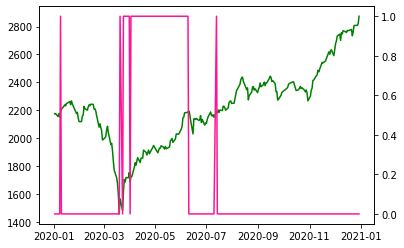

In [171]:
import matplotlib.pyplot as plt
start = '2020-01-01'
end = '2020-12-31'

fig, ax1 = plt.subplots()
ax1.plot(plot_df.Close.loc[start:end], color='green')

ax2 = ax1.twinx()
ax2.plot(plot_df.position[start:end], color='deeppink')

plt.show()
